In [1]:
dups = '../out/duplicates_correlation.tsv'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
# other imports
import numpy as np
import pandas as pd
import statsmodels.stats.multitest as sm

In [4]:
r = pd.read_table(dups)

In [5]:
r['corrected'] = -np.log10(sm.multipletests(r['pval-score'],
                                            method='fdr_bh')[1])

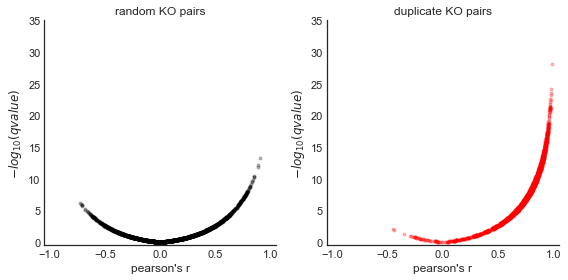

In [6]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(r[r['genes'] == 'shuffled']['corr-score'],
         r[r['genes'] == 'shuffled']['corrected'],
         'k.',
         alpha=0.25)

plt.ylim(-0.5, 35)
plt.xlim(-1.05, 1.05)

plt.xlabel('pearson\'s r')
plt.ylabel('$-log_{10}(qvalue)$')

plt.title('random KO pairs')

plt.subplot(122)

plt.plot(r[r['genes'] == 'same']['corr-score'],
         r[r['genes'] == 'same']['corrected'],
         'r.',
         alpha=0.25)

plt.ylim(-0.5, 35)
plt.xlim(-1.05, 1.05)

plt.xlabel('pearson\'s r')
plt.ylabel('$-log_{10}(qvalue)$')

plt.title('duplicate KO pairs')

sns.despine()
plt.tight_layout();

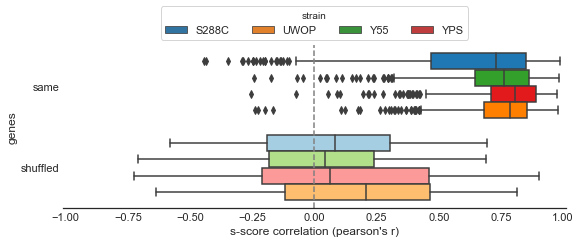

In [7]:
plt.figure(figsize=(9, 3))

ax = sns.boxplot(data=r,
                 x='corr-score',
                 y='genes',
                 hue='strain',
                 hue_order=['S288C',
                            'UWOP',
                            'Y55',
                            'YPS'])

colors = sns.color_palette("Paired", 8)
for b1, b2, c in zip(range(4),
                     range(4, 8),
                     range(0, 8, 2)):
    ax.artists[b1].set_facecolor(colors[c+1])
    ax.artists[b2].set_facecolor(colors[c])

plt.xlim(-1.01, 1.01)
plt.xlabel('s-score correlation (pearson\'s r)')
plt.axvline(0, 
            linestyle='dashed',
            color='grey')

plt.legend(frameon=True,
           title='strain',
           ncol=4,
           bbox_to_anchor=(0.5, 1),
           loc='lower center')

sns.despine(left=True)

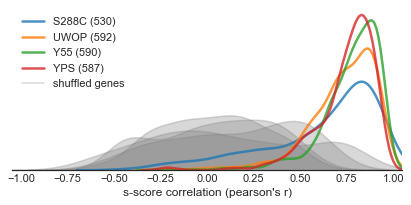

In [8]:
plt.figure(figsize=(7, 3))

for strain in ['S288C',
               'UWOP',
               'Y55',
               'YPS']:
    sns.kdeplot(r[(r['strain'] == strain) &
                  (r['genes'] == 'same')]['corr-score'],
                label=strain + ' (%d)' % r.groupby(['strain', 'genes']).count().loc[(strain,
                                                                                     'same'),
                                                                                    'gene'],
                lw=2.5,
                alpha=0.8)
    if strain == 'YPS':
        label = 'shuffled genes'
    else:
        label = '_'
    sns.kdeplot(r[(r['strain'] == strain) &
                  (r['genes'] == 'shuffled')]['corr-score'],
                label=label,
                color='grey',
                shade=True,
                alpha=0.3)
    
plt.xlim(-1.05, 1.05)
plt.xlabel('s-score correlation (pearson\'s r)')

plt.ylabel('')
plt.yticks([])

sns.despine(left=True);

Only strains in different plates
---

In [10]:
r['plate1'] = [int(x[:2]) for x in r['position1']]
r['plate2'] = [int(x[:2]) for x in r['position2']]

In [14]:
r = r[r['plate1'] != r['plate2']]

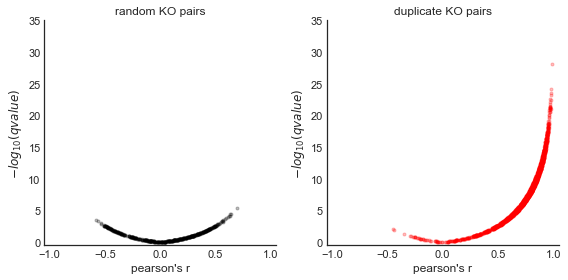

In [15]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(r[r['genes'] == 'shuffled']['corr-score'],
         r[r['genes'] == 'shuffled']['corrected'],
         'k.',
         alpha=0.25)

plt.ylim(-0.5, 35)
plt.xlim(-1.05, 1.05)

plt.xlabel('pearson\'s r')
plt.ylabel('$-log_{10}(qvalue)$')

plt.title('random KO pairs')

plt.subplot(122)

plt.plot(r[r['genes'] == 'same']['corr-score'],
         r[r['genes'] == 'same']['corrected'],
         'r.',
         alpha=0.25)

plt.ylim(-0.5, 35)
plt.xlim(-1.05, 1.05)

plt.xlabel('pearson\'s r')
plt.ylabel('$-log_{10}(qvalue)$')

plt.title('duplicate KO pairs')

sns.despine()
plt.tight_layout();

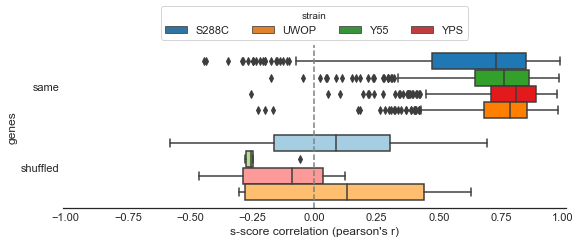

In [16]:
plt.figure(figsize=(9, 3))

ax = sns.boxplot(data=r,
                 x='corr-score',
                 y='genes',
                 hue='strain',
                 hue_order=['S288C',
                            'UWOP',
                            'Y55',
                            'YPS'])

colors = sns.color_palette("Paired", 8)
for b1, b2, c in zip(range(4),
                     range(4, 8),
                     range(0, 8, 2)):
    ax.artists[b1].set_facecolor(colors[c+1])
    ax.artists[b2].set_facecolor(colors[c])

plt.xlim(-1.01, 1.01)
plt.xlabel('s-score correlation (pearson\'s r)')
plt.axvline(0, 
            linestyle='dashed',
            color='grey')

plt.legend(frameon=True,
           title='strain',
           ncol=4,
           bbox_to_anchor=(0.5, 1),
           loc='lower center')

sns.despine(left=True)

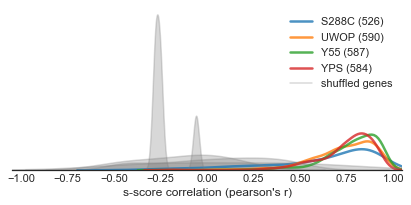

In [17]:
plt.figure(figsize=(7, 3))

for strain in ['S288C',
               'UWOP',
               'Y55',
               'YPS']:
    sns.kdeplot(r[(r['strain'] == strain) &
                  (r['genes'] == 'same')]['corr-score'],
                label=strain + ' (%d)' % r.groupby(['strain', 'genes']).count().loc[(strain,
                                                                                     'same'),
                                                                                    'gene'],
                lw=2.5,
                alpha=0.8)
    if strain == 'YPS':
        label = 'shuffled genes'
    else:
        label = '_'
    sns.kdeplot(r[(r['strain'] == strain) &
                  (r['genes'] == 'shuffled')]['corr-score'],
                label=label,
                color='grey',
                shade=True,
                alpha=0.3)
    
plt.xlim(-1.05, 1.05)
plt.xlabel('s-score correlation (pearson\'s r)')

plt.ylabel('')
plt.yticks([])

sns.despine(left=True);

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>